In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':200000000,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Commodities'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-25 to 2019-07-03 - 29'

In [4]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 8) & (stat['shrp'] > 0.4)]
print(len(stat))
stat

12


,len,mean,std,shrp,drawdown
Symbols,,,,,
PHYS,29,5.187147,3.380410,1.487517,2.631572
GLD,29,4.814602,3.279573,1.419658,2.667662
SGOL,29,4.831132,3.305862,1.413369,2.692057
BAR,29,4.811486,3.294604,1.412235,2.700990
IAU,29,4.830187,3.332604,1.401744,2.716592
GLDM,29,4.813770,3.324097,1.400393,2.746475
DBA,29,3.118105,2.373345,1.246922,4.012349
CEF,29,4.012200,3.237615,1.190219,2.663438
GLTR,29,3.808351,3.820108,0.955371,3.584793


Populating the interactive namespace from numpy and matplotlib
evicted SGOL 0.9999107133504828
evicted IAU 0.9997798677245233
evicted CEF 0.9826715950093952
evicted BAR 0.9995305590517272
evicted GLDM 0.9997924755524406
evicted SIVR 0.9993398090599802
evicted SLV 0.9854230049400006
evicted PSLV 0.984551548749607
evicted GLTR 0.9778931286683663
evicted GLD 0.9961058654272599
{'DBA': 0.56, 'PHYS': 0.44}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,4.018822,1.691318,-0.147430,2.954736,4.576779,5.168872,6.062063,2.282299,2.139541
PHYS,29.0,5.187147,3.380410,-0.195126,2.898543,4.815866,6.988189,11.545982,1.487517,2.631572
DBA,29.0,3.118105,2.373345,-1.081083,0.967936,3.269591,4.914932,7.138261,1.246922,4.012349


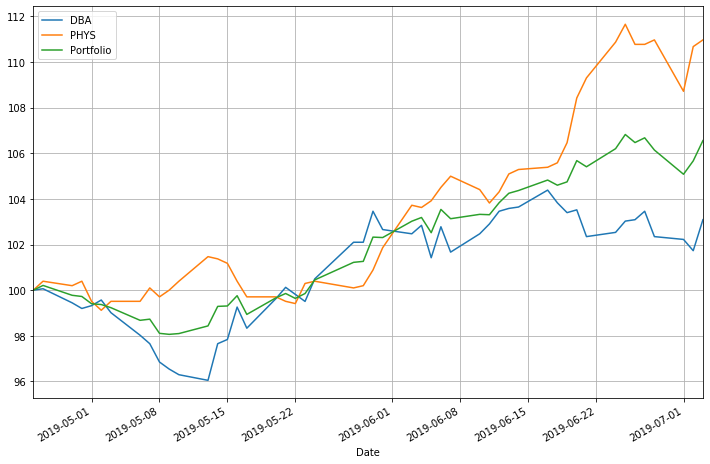

In [5]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)

In [6]:
quote.setup_mask(['GLD', 'DBA'])
quote.find_optimal_ratio()

({'GLD': 0.44, 'DBA': 0.56}, 3.8588, 1.6295, 2.2706)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,3.854363,1.625434,-0.057754,2.980656,4.325865,4.921916,6.055759,2.273629,2.081255
GLD,29.0,4.814602,3.279573,-0.272272,2.826413,4.156033,6.600082,11.065129,1.419658,2.667662
DBA,29.0,3.118105,2.373345,-1.081083,0.967936,3.269591,4.914932,7.138261,1.246922,4.012349


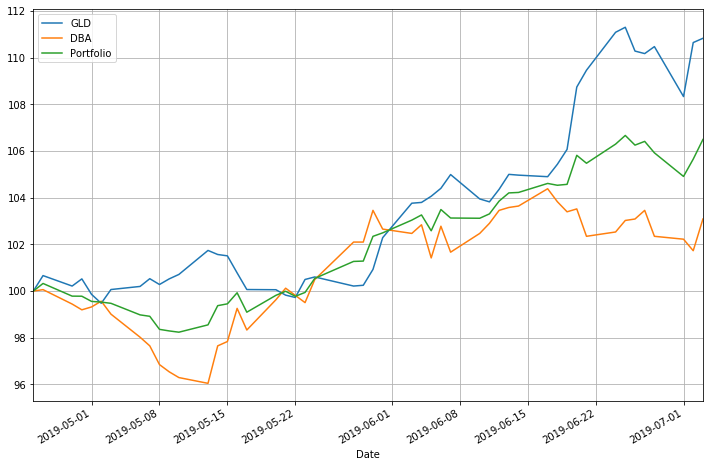

In [7]:
quote.graph({'GLD': 0.44, 'DBA': 0.56})